### Задание 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [4]:
from sklearn.cluster import KMeans

In [5]:
boston = load_boston()

In [6]:
data = boston['data']
feature_names = boston['feature_names']
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
target = boston['target']
y = pd.DataFrame(target, columns=['price'])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()

In [10]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [35]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [36]:
plt.style.use('fivethirtyeight')

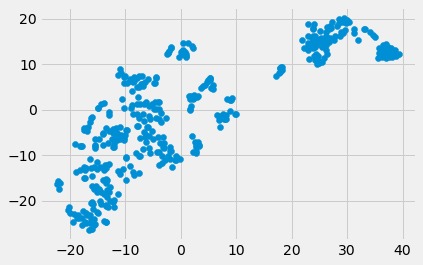

In [37]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2

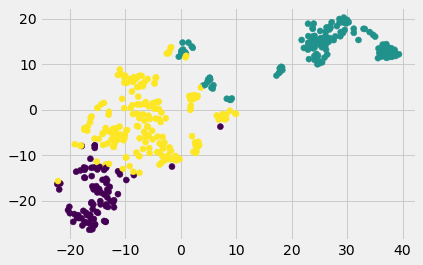

In [38]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [41]:
klaster_0_CRIM = X_train.loc[labels_train == 0, 'CRIM'].mean()
klaster_0_CRIM

0.07356558139534886

In [42]:
klaster_1_CRIM = X_train.loc[labels_train == 1, 'CRIM'].mean()
klaster_1_CRIM

10.797028425196853

In [43]:
klaster_2_CRIM = X_train.loc[labels_train == 2, 'CRIM'].mean()
klaster_2_CRIM

0.42166020942408367

In [44]:
klaster_0_price = y_train.loc[labels_train == 0, 'price'].mean()
klaster_0_price

27.788372093023252

In [45]:
klaster_1_price = y_train.loc[labels_train == 1, 'price'].mean()
klaster_1_price

16.165354330708666

In [46]:
klaster_2_price = y_train.loc[labels_train == 2, 'price'].mean()
klaster_2_price

24.958115183246072

### Задание 3

In [47]:
labels_test = kmeans.predict(X_test_scaled)

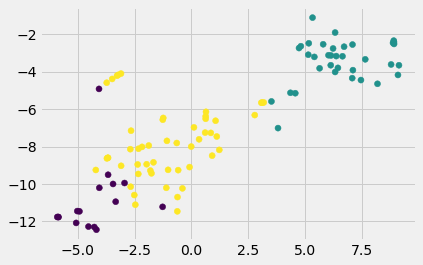

In [50]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [51]:
klaster_0_CRIM_test = X_test.loc[labels_test == 0, 'CRIM'].mean()
klaster_0_CRIM_test

0.062060000000000004

In [52]:
klaster_1_CRIM_test = X_test.loc[labels_test == 1, 'CRIM'].mean()
klaster_1_CRIM_test

10.165531142857143

In [53]:
klaster_2_CRIM_test = X_test.loc[labels_test == 2, 'CRIM'].mean()
klaster_2_CRIM_test

0.26607882352941176

In [54]:
klaster_0_price_test = y_test.loc[labels_test == 0, 'price'].mean()
klaster_0_price_test

31.35

In [55]:
klaster_1_price_test = y_test.loc[labels_test == 1, 'price'].mean()
klaster_1_price_test

16.437142857142856

In [56]:
klaster_2_price_test = y_test.loc[labels_test == 2, 'price'].mean()
klaster_2_price_test

21.860784313725492